In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('student-mat.csv',sep=";")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
categorical_data = data[categorical_columns]
print(categorical_data.head())

  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [4]:
X = encoded_df.drop(['G3'], axis=1)
Y = encoded_df['G3']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=41)
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
x_train: (355, 41)
y_train: (355,)

Testing set shapes:
x_test: (40, 41)
y_test: (40,)


In [5]:
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
   # accuracy=linear.score(x_test,y_test)
    accuracy = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy>best:
        with open("Studentmodel1.pickle","wb") as f:
            pickle.dump(linear,f)
pickle_in = open("Studentmodel1.pickle", "rb")
linear = pickle.load(pickle_in)
best_accuracy = linear.score(x_test, y_test)
print("Accuracy Befor Feature Selection:", best_accuracy)
#linear_cv_accuracy = cross_val_score(linear, X, Y, cv=5).mean()
#print("Linear linear Cross-Validation Accuracy:", linear_cv_accuracy)

Accuracy Befor Feature Selection: 0.7273837432904102


In [6]:
print("Co-efficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)
prediction= linear.predict(x_test)
print("Actual Value\t\tPredicted Value")
for x in range(len(prediction)):
    print("{}\t\t{:.5f}".format(y_test.values[x], prediction[x]))

Co-efficient: 
 [-0.16881722  0.1233673  -0.16081589  0.06363251 -0.0475564  -0.25652506
  0.36816772  0.01435551  0.04699824 -0.25043104  0.20085413  0.05174668
  0.04654244  0.18346552  0.95541044  0.37482263  0.20684415 -0.05784118
  0.05598483 -0.14435438 -0.20715786 -0.04604291  0.12270499 -0.09362797
  0.54066756  0.02130498 -0.30171024  0.00236021 -0.27441422  0.18547447
 -0.07095195  0.16903012 -0.05267672  0.28373146  0.06661027  0.14849194
 -0.29854349 -0.0913381   0.79546108 -0.2373885  -0.31597399]
Intercept: 
 -1.3837347832202855
Actual Value		Predicted Value
10		9.95484
8		5.41073
14		13.82278
7		5.98520
14		12.58511
8		9.30884
0		-1.79544
11		7.91306
6		5.29976
16		15.54381
9		8.45371
10		9.56847
10		9.39885
10		5.64123
10		10.16579
14		12.82619
9		9.28259
0		7.52870
0		-0.30113
15		15.27056
13		12.20188
16		16.16051
15		13.73342
12		12.71395
10		9.52791
7		7.11320
10		10.21653
5		3.62619
17		16.30226
0		8.20010
14		15.96307
12		12.18223
8		6.74221
6		3.90765
11		11.6587

In [7]:
best_accuracy_after_fs = 0  
selected_feature_indices = None
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    rfe = RFE(LinearRegression(), n_features_to_select=41)
    rfe.fit(x_train, y_train)
    selected_features = rfe.get_support()
    selected_feature_indices = [i for i, val in enumerate(selected_features) if val]
    linear.fit(x_train.loc[:, selected_features], y_train)
    #accuracy_after_fs = linear.score(x_test.loc[:, selected_features], y_test)
    accuracy_after_fs = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy_after_fs > best_accuracy_after_fs:  
        best_accuracy_after_fs = accuracy_after_fs  
        with open("Studentmodel2.pickle", "wb") as f:
            pickle.dump(linear, f)
pickle_in_fs = open("Studentmodel2.pickle", "rb")
linear_fs = pickle.load(pickle_in_fs)
best_accuracy_after_fs=linear_fs.score(x_test,y_test)
print("Best Accuracy After Feature Selection:", best_accuracy_after_fs)


Best Accuracy After Feature Selection: 0.7817043763847175


In [8]:
print("Co-efficient: \n", linear_fs.coef_)
print("Intercept: \n", linear_fs.intercept_)
x_test_selected_dense = x_test.values
prediction2 = linear_fs.predict(x_test_selected_dense)
print("Actual Value\t\tPredicted Value")
for x in range(len(prediction2)):
    print("{}\t\t{:.5f}".format(y_test.values[x], prediction2[x]))

Co-efficient: 
 [-0.17804814  0.11619432 -0.10380243  0.14014616 -0.11410485 -0.25107366
  0.36922388  0.03614891  0.04080975 -0.20065325  0.17418312  0.08581586
  0.04515659  0.1961814   0.96740293  0.43684991  0.14188183  0.09041617
  0.03989646 -0.09170547 -0.05199205  0.12989141  0.11276259  0.00693794
  0.4310029  -0.02995953 -0.27160078 -0.11832992 -0.25463949  0.15130919
  0.1089113   0.24519943 -0.02755247  0.52071499  0.15197833  0.08224171
 -0.32985988 -0.32967142  0.28097375 -0.19756096 -0.1990152 ]
Intercept: 
 -1.5375588555046455
Actual Value		Predicted Value
11		10.45207
6		7.02386
13		12.82277
8		5.29649
11		10.43680
6		6.85184
11		13.51953
12		12.61642
11		9.63424
10		9.00396
0		0.65903
13		12.03336
9		8.98385
10		9.75093
0		6.80884
10		8.52042
0		6.30925
0		7.62746
10		9.66150
11		9.38803
10		10.43332
13		12.47434
15		15.18910
14		14.21950
8		6.89748
13		12.21670
15		13.21236
8		6.51170
0		-1.27370
16		16.34766
10		9.06091
0		3.32902
7		5.66137
9		8.40838
11		8.74624
1

F:\Advance Java\Python\Env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
best_gb_model = None
best_accuracy = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=30)
    gb_model.fit(x_train, y_train)
    #accuracy = gb_model.score(x_test, y_test)
    #accuracy = gb_model.cross_val_score(linear, X, Y, cv=5).mean()
    accuracy = cross_val_score(gb_model, X, Y, cv=5).mean() 
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gb_model = gb_model

with open("Gradient_Boosting.pickle", "wb") as f:
    pickle.dump(best_gb_model, f)
pickle_in_gb = open("Gradient_Boosting.pickle", "rb")
linear_gb = pickle.load(pickle_in_gb)
best_gb_accuracy=linear_gb.score(x_test,y_test)
print("Best Accuracy Gradient Boosting Regressor :",best_gb_accuracy )

Best Accuracy Gradient Boosting Regressor : 0.950101575321248


In [10]:


best_rf_model = None
best_rf_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)  
    rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
    rf_model.fit(x_train, y_train)
    #rf_accuracy = rf_model.score(x_test, y_test)
    rf_accuracy = cross_val_score(rf_model, X, Y, cv=6).mean() 
    if rf_accuracy > best_rf_accuracy:
        best_rf_accuracy = rf_accuracy
        best_rf_model = rf_model
with open("Random_Forest.pickle", "wb") as f:
    pickle.dump(best_rf_model, f)
pickle_in_rf = open("Random_Forest.pickle", "rb") 
linear_rf = pickle.load(pickle_in_rf)
best_rf_accuracy=linear_rf.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_rf_accuracy)


Best Accuracy After Random Forest: 0.7144722229252614


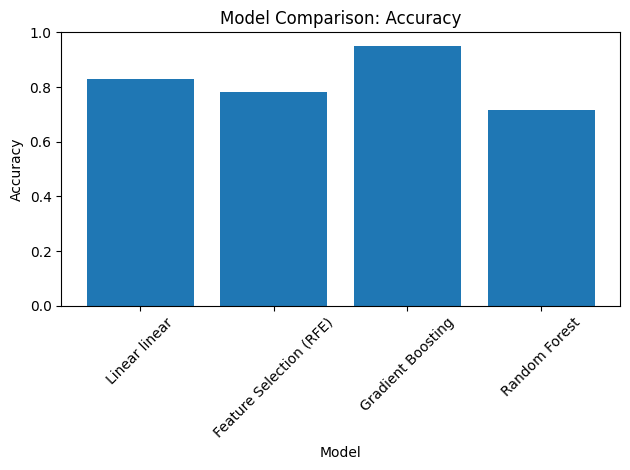

In [11]:

# List of model names and their corresponding accuracies
model_names = ['Linear linear', 'Feature Selection (RFE)', 'Gradient Boosting', 'Random Forest']
accuracies = [best_accuracy, best_accuracy_after_fs, best_gb_accuracy, best_rf_accuracy]

plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


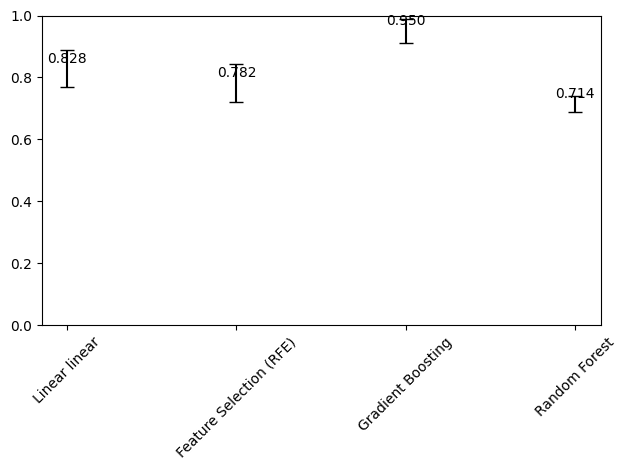

In [12]:
errors = [np.std(cross_val_score(model, X, Y, cv=5)) for model in [linear, linear_fs, linear_gb, linear_rf]]
plt.errorbar(model_names, accuracies, yerr=errors, fmt='none', color='black', capsize=5)

# Annotate with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

plt.show()


F:\Advance Java\Python\Env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Feature Selection Precision: 0.21666666666666665
Feature Selection Recall: 0.05
Feature Selection F1 Score: 0.7454545454545455
Linear linear Precision: 0.21666666666666665
Linear linear Recall: 0.05
Linear linear F1 Score: 0.7454545454545455
Gradient Boosting Precision: 0.6520833333333333
Gradient Boosting Recall: 0.5
Gradient Boosting F1 Score: 0.5804166666666667
Random Forest Precision: 0.5758333333333333
Random Forest Recall: 0.475
Random Forest F1 Score: 0.4796031746031747


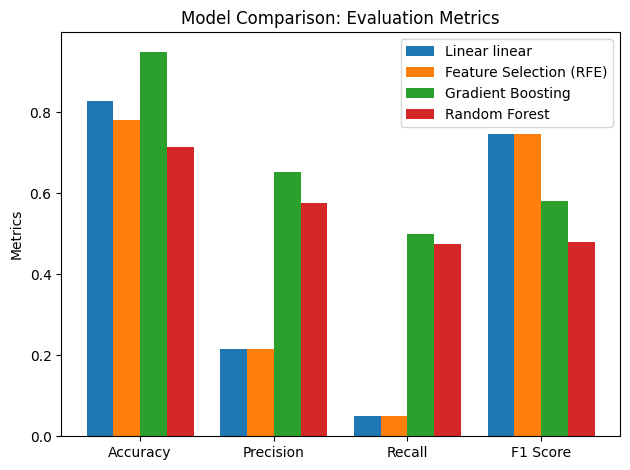

In [13]:

y_pred_fs = linear_fs.predict(x_test_selected_dense)

# Calculate precision, recall, and F1 score for Feature Selection (RFE)
precision_fs = precision_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
recall_fs = recall_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
f1_fs = f1_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
print("Feature Selection Precision:", precision_fs)
print("Feature Selection Recall:", recall_fs)
print("Feature Selection F1 Score:", f1_fs)

# Calculate precision, recall, and F1 score for Linear linear
precision_linear = precision_score(y_test, prediction2.round(), average='weighted', zero_division=1)
recall_linear = recall_score(y_test, prediction2.round(), average='weighted', zero_division=1)
f1_linear = f1_score(y_test, prediction2.round(), average='weighted', zero_division=1)
print("Linear linear Precision:", precision_linear)
print("Linear linear Recall:", recall_linear)
print("Linear linear F1 Score:", f1_linear)

# Calculate precision, recall, and F1 score for Gradient Boosting
precision_gb = precision_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
recall_gb = recall_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
f1_gb = f1_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
print("Gradient Boosting Precision:", precision_gb)
print("Gradient Boosting Recall:", recall_gb)
print("Gradient Boosting F1 Score:", f1_gb)

# Calculate precision, recall, and F1 score for Random Forest
precision_rf = precision_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
recall_rf = recall_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
f1_rf = f1_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# List of evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
feature_metrics= [best_accuracy_after_fs,precision_fs,recall_fs,f1_fs]
linear_metrics = [best_accuracy, precision_linear, recall_linear, f1_linear]
gb_metrics = [best_gb_accuracy, precision_gb, recall_gb, f1_gb]
rf_metrics = [best_rf_accuracy, precision_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 1.5, linear_metrics, width, label='Linear linear')
rects2 = ax.bar(x - width * 0.5, feature_metrics, width, label='Feature Selection (RFE)')
rects3 = ax.bar(x + width * 0.5, gb_metrics, width, label='Gradient Boosting')
rects4 = ax.bar(x + width * 1.5, rf_metrics, width, label='Random Forest')

ax.set_ylabel('Metrics')
ax.set_title('Model Comparison: Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()


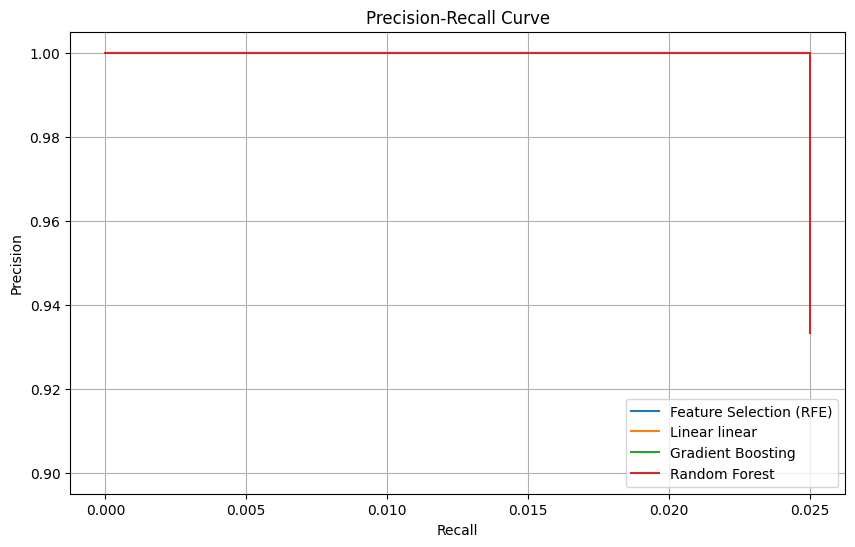

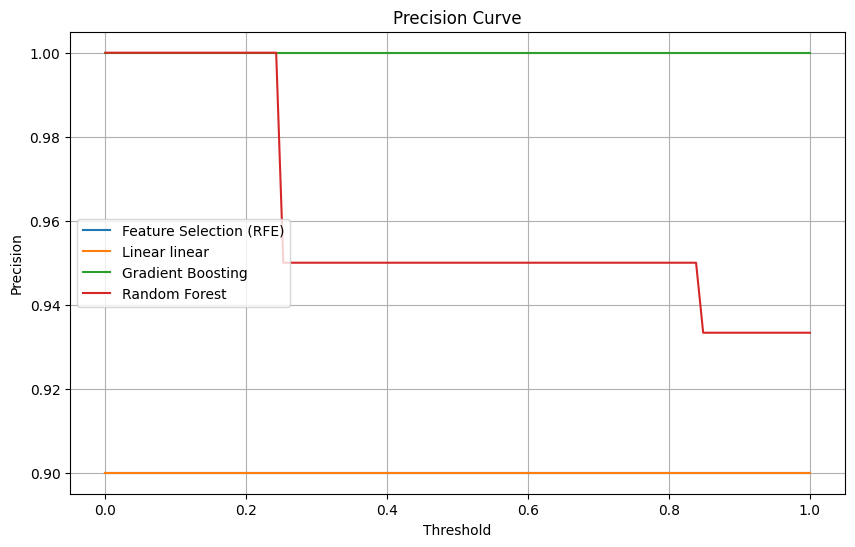

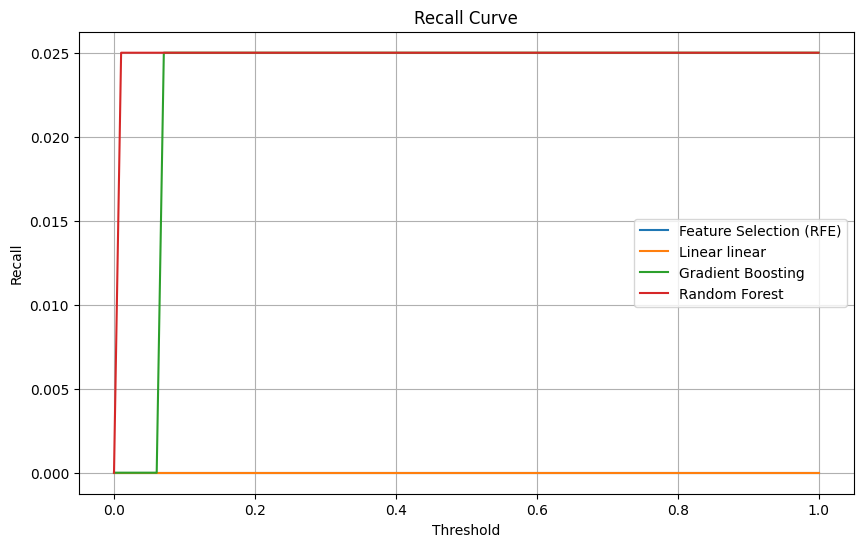

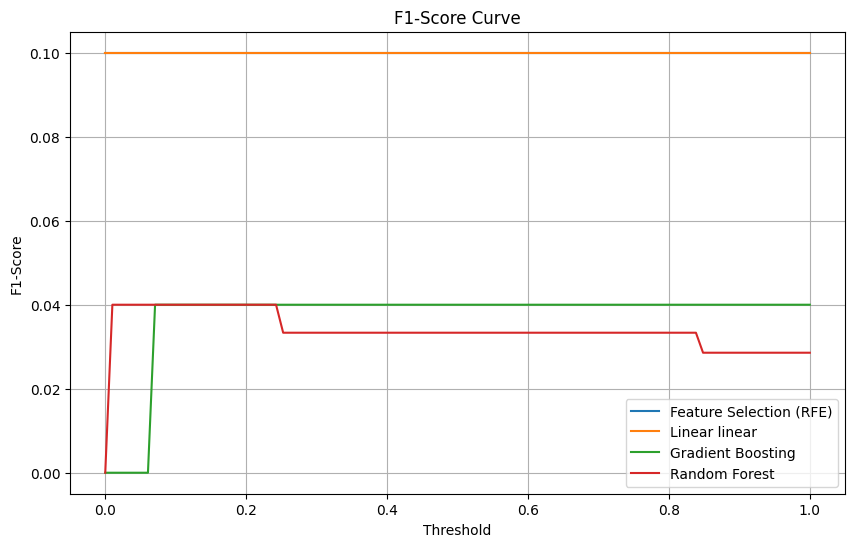

In [14]:

# Initialize variables for storing precision, recall, and F1 scores
precision_scores_fs = []
recall_scores_fs = []
f1_scores_fs = []
precision_scores_linear = []
recall_scores_linear = []
f1_scores_linear = []
precision_scores_gb = []
recall_scores_gb = []
f1_scores_gb = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []

# Loop to calculate precision, recall, and F1 scores for different threshold values
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    y_pred_fs_round = (y_pred_fs >= threshold).astype(int)
    y_pred_linear_round = (prediction2 >= threshold).astype(int)
    y_pred_gb_round = (linear_gb.predict(x_test) >= threshold).astype(int)
    y_pred_rf_round = (linear_rf.predict(x_test) >= threshold).astype(int)
    
    precision_scores_fs.append(precision_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    recall_scores_fs.append(recall_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    f1_scores_fs.append(f1_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    
    precision_scores_linear.append(precision_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    recall_scores_linear.append(recall_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    f1_scores_linear.append(f1_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    
    precision_scores_gb.append(precision_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    recall_scores_gb.append(recall_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    f1_scores_gb.append(f1_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    
    precision_scores_rf.append(precision_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    recall_scores_rf.append(recall_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    f1_scores_rf.append(f1_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_scores_fs, precision_scores_fs, label='Feature Selection (RFE)')
plt.plot(recall_scores_linear, precision_scores_linear, label='Linear linear')
plt.plot(recall_scores_gb, precision_scores_gb, label='Gradient Boosting')
plt.plot(recall_scores_rf, precision_scores_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, precision_scores_linear, label='Linear linear')
plt.plot(thresholds, precision_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, precision_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.legend()
plt.grid()
plt.show()

# Plot Recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, recall_scores_linear, label='Linear linear')
plt.plot(thresholds, recall_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, recall_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Plot F1-Score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, f1_scores_linear, label='Linear linear')
plt.plot(thresholds, f1_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, f1_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score Curve')
plt.legend()
plt.grid()
plt.show()


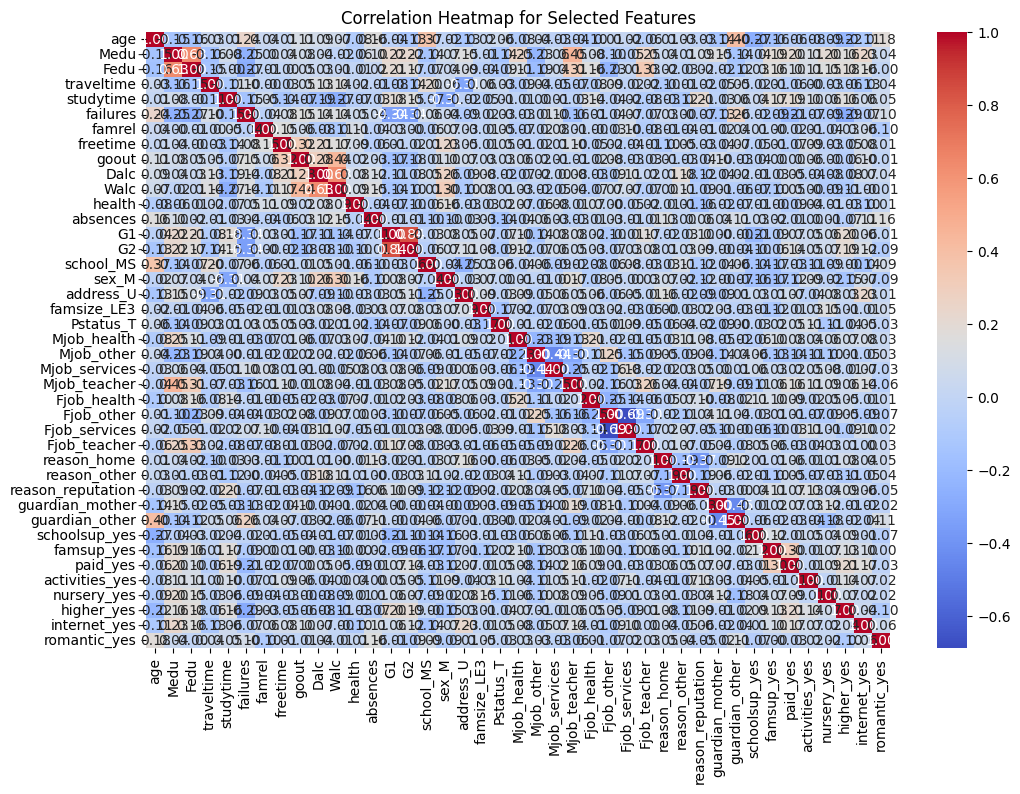

In [16]:
selected_features_subset = x_train.iloc[:, selected_feature_indices]
correlation_matrix = selected_features_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

Manually selected Features and Linear regression:  0.8770058990726404
Co-efficient: 
 [ 0.15738511  0.97207506 -0.17291282 -0.20692346  0.03612583]
Intercept: 
 -1.5039953017860643


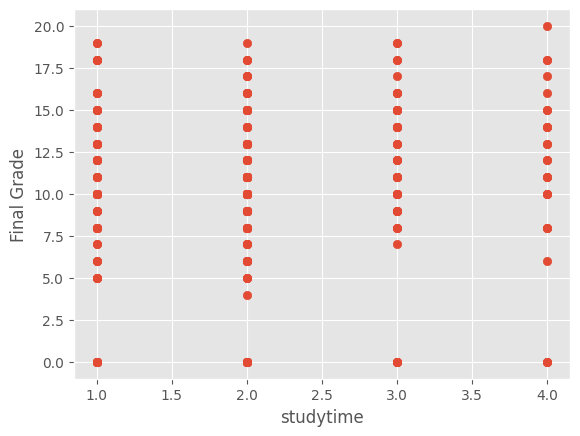

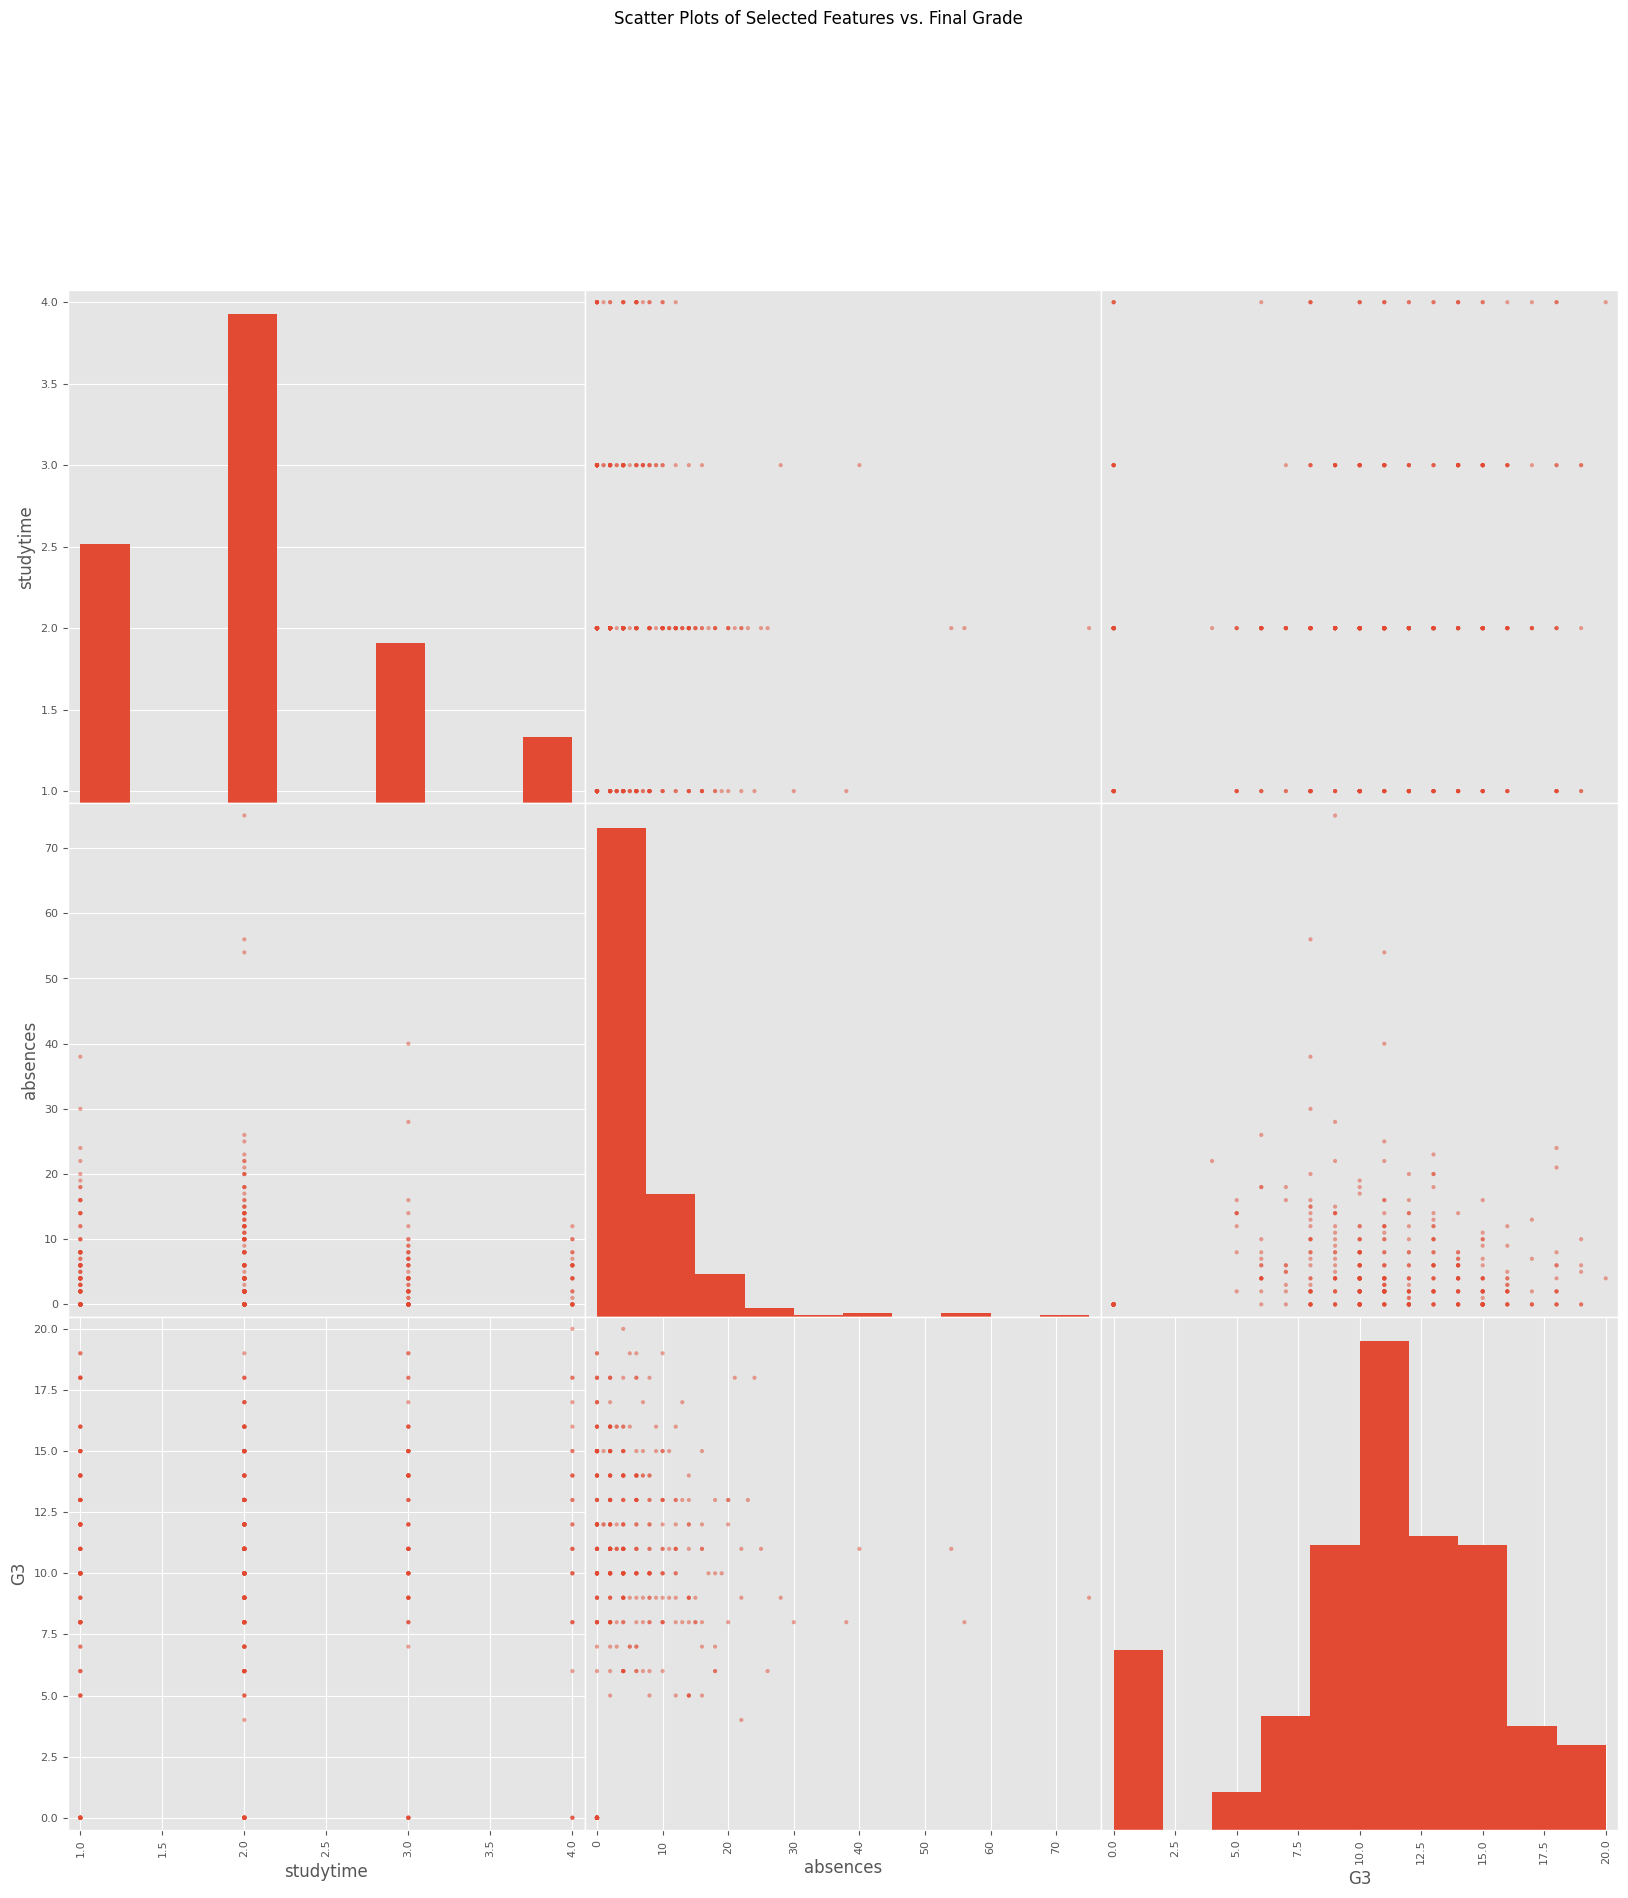

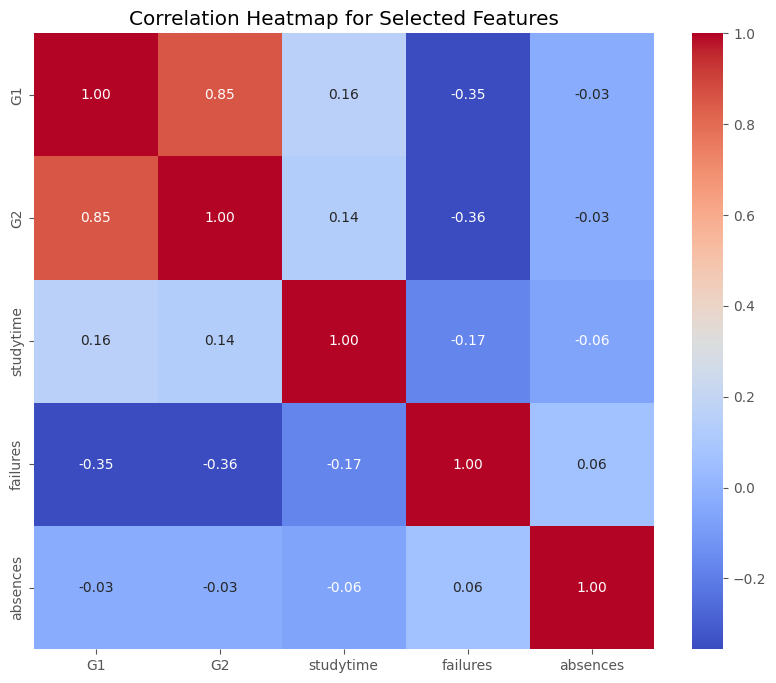

F:\Advance Java\Python\Env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


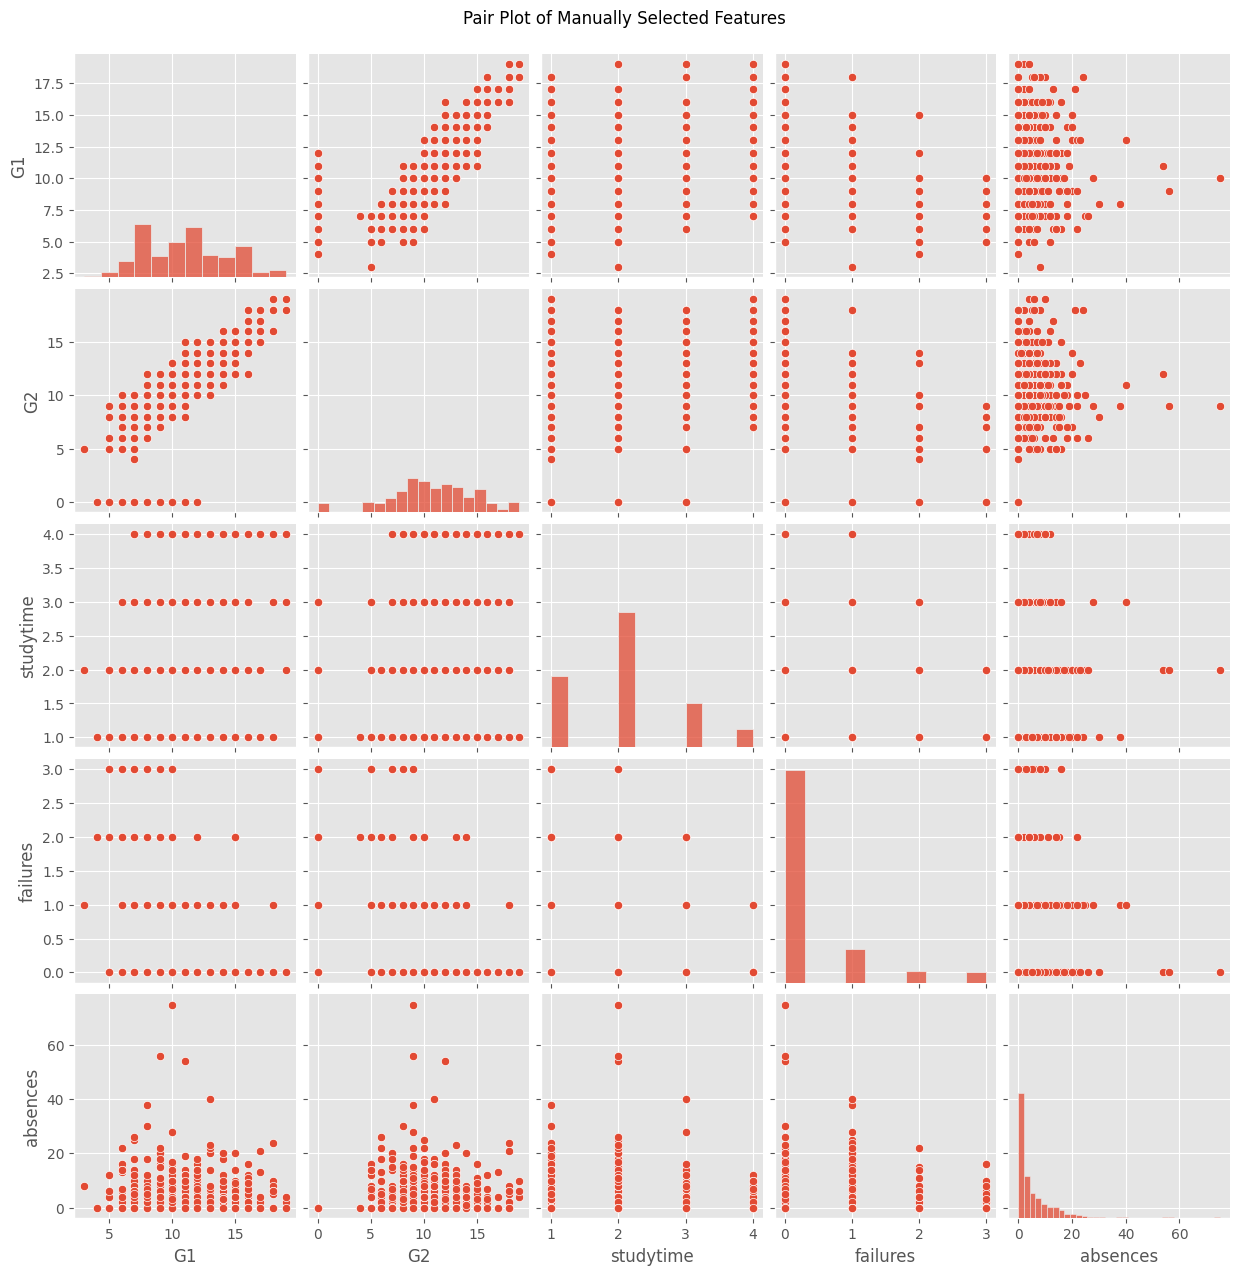

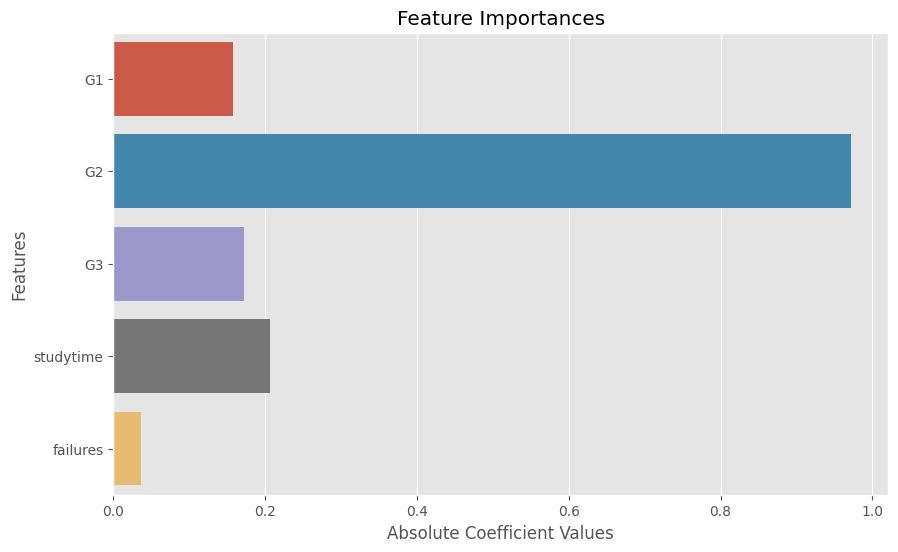

In [39]:
data = pd.read_csv('student-mat.csv', sep=";")
data=data[["G1","G2","G3","studytime","failures","absences"]]
pre="G3"
P= np.array(data.drop([pre], axis=1))
Q=np.array(data[pre])
p_train, p_test, q_train, q_test=train_test_split(P,Q,test_size=0.1)
regression=linear_model.LinearRegression()
regression.fit(p_train,q_train)
accuracyRegression=regression.score(p_test,q_test)
print("Manually selected Features and Linear regression: ",accuracyRegression)
print("Co-efficient: \n", regression.coef_)
print("Intercept: \n", regression.intercept_)
r='studytime'
style.use("ggplot")
plt.scatter(data[r],data["G3"])
plt.xlabel(r)
plt.ylabel("Final Grade")
plt.show()
selected_features = ['studytime', 'absences']
scatter_matrix(data[selected_features + [pre]], figsize=(20, 20), diagonal='hist')
plt.suptitle("Scatter Plots of Selected Features vs. Final Grade", y=1.02)
plt.show()
selected_features = ["G1", "G2", "studytime", "failures", "absences"]
selected_features_subset = data[selected_features]
correlation_matrix_subset = selected_features_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

selected_features = ["G1", "G2", "studytime", "failures", "absences"]
sns.pairplot(data[selected_features])
plt.suptitle("Pair Plot of Manually Selected Features", y=1.02)
plt.show()
feature_importances = np.abs(regression.coef_)
feature_names = data.columns[:-1]  # Exclude the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Absolute Coefficient Values")
plt.ylabel("Features")
plt.show()